In [1]:
import pandas as pd
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set_palette('tab10')

In [3]:
df = pd.read_csv('the_office.csv', index_col=0)
df.head()

,character,line,season,episode
0,Michael,All right Jim. Your quarterlies look very goo...,1,1
1,Jim,"Oh, I told you. I couldn’t close it. So…",1,1
2,Michael,So you’ve come to the master for guidance? Is...,1,1
3,Jim,"Actually, you called me in here, but yeah.",1,1
4,Michael,"All right. Well, let me show you how it’s don...",1,1


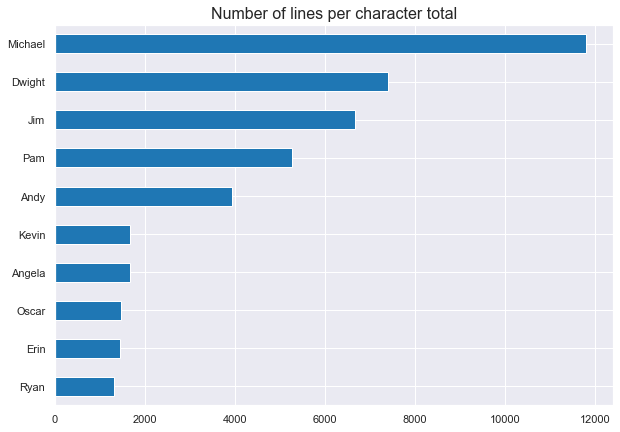

In [4]:
plt.figure(figsize=[10, 7])
df['character'].value_counts()[:10].sort_values(ascending=True).plot.barh()
plt.title('Number of lines per character total', fontsize=16)
plt.show()

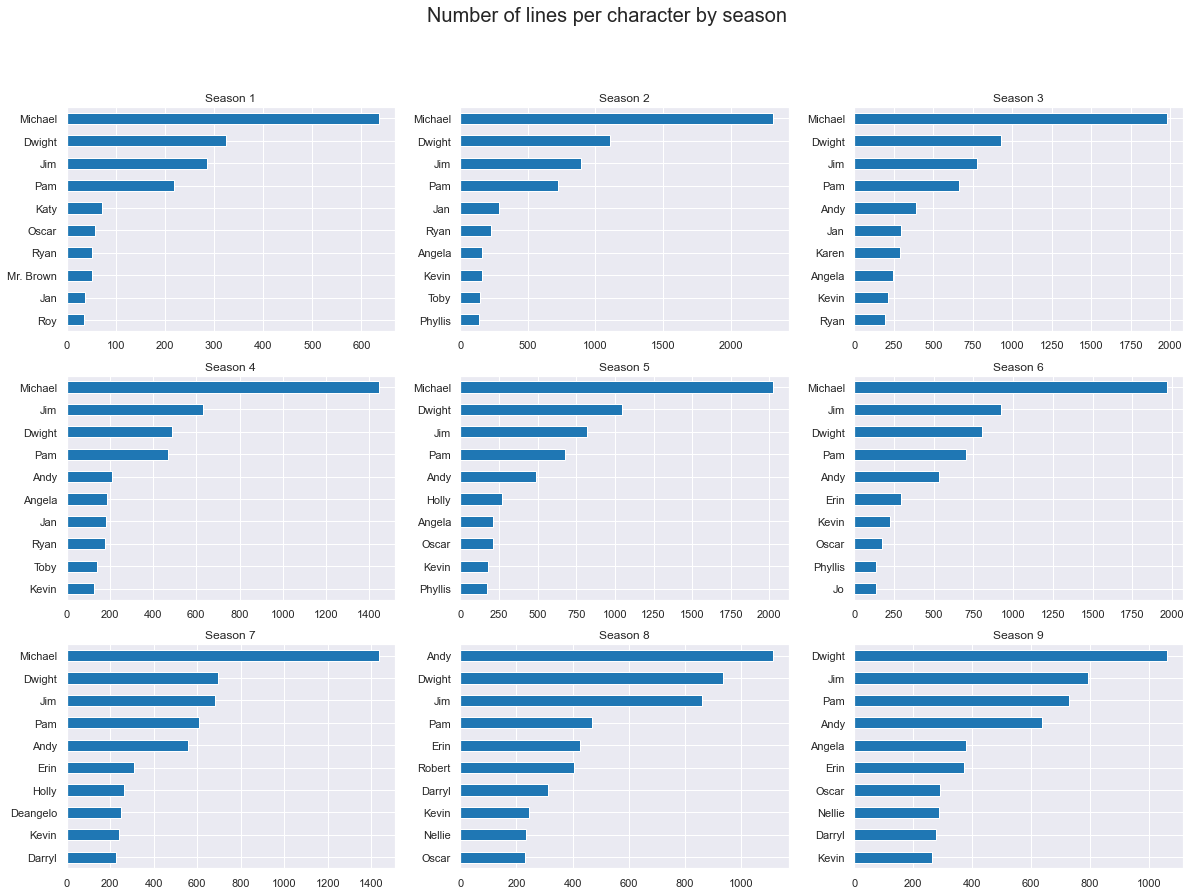

In [5]:
fig, ax = plt.subplots(3, 3, figsize=(20,14))
for season in range(1, 10):
    plt.subplot(3, 3, season)
    df.loc[df.season == season, 'character'].value_counts()[:10].sort_values(ascending=True).plot.barh()
    plt.title('Season ' + str(season))
plt.suptitle('Number of lines per character by season', fontsize=20)
plt.show()

In [6]:
def show_top_words(column=df['line'], n_words=50):
    all_words = column.str.split(expand=True).unstack().value_counts()
    data = [go.Bar(
                x = all_words.index.values[:n_words],
                y = all_words.values[:n_words],
                marker= dict(colorscale='Jet',
                             color = all_words.values[:n_words]
                            ),
        )]

    layout = go.Layout(
        title='Top ' + str(n_words) + ' words in the dataset before preproccesing'
    )

    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='basic-bar')

In [7]:
show_top_words(n_words=10)

In [8]:
import string
from string import punctuation
from nltk.corpus import stopwords
import re

english_stopwords = stopwords.words('english')
custom_stopwords = ['oh', 'uh', 'um', 'yeah', 'okay', 'ok', 'right', 'alright', 'like', 'know', 'hey', 'gonna']
english_stopwords.extend(custom_stopwords)

tidytext_stopwords = pd.read_csv(
    "https://raw.githubusercontent.com/juliasilge/tidytext/master/data-raw/stop_words.csv"
)
more_stopwords = list(tidytext_stopwords['word'])
english_stopwords.extend(more_stopwords)

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\[[^\]]*\]', '', text)
    text = re.sub(f"[{re.escape(punctuation)}]", "", text)
    words = [word for word in text.split() if word.isalpha()]
    words = [word for word in words if word not in english_stopwords]
    text = " ".join(words)
    return text

In [9]:
df['line_preprocessed'] = df['line'].apply(lambda x: preprocess_text(x))

In [10]:
df

,character,line,season,episode,line_preprocessed
0,Michael,All right Jim. Your quarterlies look very goo...,1,1,jim quarterlies library
1,Jim,"Oh, I told you. I couldn’t close it. So…",1,1,told close
2,Michael,So you’ve come to the master for guidance? Is...,1,1,master guidance grasshopper
3,Jim,"Actually, you called me in here, but yeah.",1,1,called
4,Michael,"All right. Well, let me show you how it’s don...",1,1,
...,...,...,...,...,...
59289,Creed,It all seems so very arbitrary. I applied for...,9,23,arbitrary applied job company hiring desk empt...
59290,Meredith,I just feel lucky that I got a chance to shar...,9,23,feel lucky chance share crummy story dump pape...
59291,Phyllis,Iâ€™m happy that this was all filmed so I can...,9,23,happy filmed remember paper company wrote
59292,Jim,I sold paper at this company for 12 years. My...,9,23,sold paper company job speak clients phone qua...


In [11]:
def show_top_words_preproccesed(column=df['line_preprocessed'], n_words=50):
    all_words = column.str.split(expand=True).unstack().value_counts()
    data = [go.Bar(
                x = all_words.index.values[:n_words],
                y = all_words.values[:n_words],
                marker= dict(colorscale='Jet',
                             color = all_words.values[:n_words]
                            ),
        )]

    layout = go.Layout(
        title='Top ' + str(n_words) + ' words in the dataset after preproccesing'
    )

    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='basic-bar')

In [12]:
show_top_words_preproccesed(n_words=10)

In [13]:
df = df[df['line_preprocessed'].map(lambda d: len(d)) > 0]
df

,character,line,season,episode,line_preprocessed
0,Michael,All right Jim. Your quarterlies look very goo...,1,1,jim quarterlies library
1,Jim,"Oh, I told you. I couldn’t close it. So…",1,1,told close
2,Michael,So you’ve come to the master for guidance? Is...,1,1,master guidance grasshopper
3,Jim,"Actually, you called me in here, but yeah.",1,1,called
5,Michael,"[on the phone] Yes, I’d like to speak to your...",1,1,speak office manager michael scott regional ma...
...,...,...,...,...,...
59289,Creed,It all seems so very arbitrary. I applied for...,9,23,arbitrary applied job company hiring desk empt...
59290,Meredith,I just feel lucky that I got a chance to shar...,9,23,feel lucky chance share crummy story dump pape...
59291,Phyllis,Iâ€™m happy that this was all filmed so I can...,9,23,happy filmed remember paper company wrote
59292,Jim,I sold paper at this company for 12 years. My...,9,23,sold paper company job speak clients phone qua...


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

lines_by_character = df.groupby('character')['line_preprocessed'].apply(lambda x: ' '.join(x))

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_df=0.02)
tfidf = vectorizer.fit_transform(lines_by_character.values)

feature_names = vectorizer.get_feature_names()
for i, character in enumerate(lines_by_character.index):
    if character in ['Dwight', 'Pam', 'Angela', 'Stanley', 'Andy', 'Ryan']:
        print(f'Top words for {character}:')
        tfidf_scores = tfidf[i, :].toarray()[0]
        top_indices = tfidf_scores.argsort()[-10:][::-1]
        for j in top_indices:
            print(f'\t{feature_names[j]} ({tfidf_scores[j]:.2f})')

Top words for Andy:
	tuna (0.32)
	cornell (0.14)
	whoa whoa (0.09)
	andy bernard (0.08)
	na (0.07)
	andrew (0.07)
	ow (0.07)
	bum bum (0.06)
	jessica (0.06)
	flag (0.06)
Top words for Angela:
	pum (0.30)
	pum pum (0.20)
	sprinkles (0.12)
	phillip (0.11)
	cats (0.10)
	parum pum (0.08)
	parum (0.08)
	kevin kevin (0.08)
	party planning (0.07)
	committee (0.07)
Top words for Dwight:
	mose (0.14)
	assistant (0.11)
	idiot (0.10)
	regional manager (0.09)
	assistant regional (0.09)
	farm (0.09)
	beet (0.08)
	temp (0.07)
	hay (0.06)
	monkey (0.06)
Top words for Pam:
	mifflin pam (0.16)
	cece (0.14)
	gosh (0.10)
	mural (0.09)
	na (0.07)
	philly (0.07)
	na na (0.07)
	paint (0.06)
	umm (0.05)
	pictures (0.05)
Top words for Ryan:
	website (0.09)
	wuphf (0.09)
	presentation (0.08)
	whoa whoa (0.07)
	kelly kapoor (0.07)
	kapoor (0.06)
	business school (0.06)
	treated (0.06)
	beet (0.06)
	powerpoint (0.05)
Top words for Stanley:
	lost mind (0.12)
	toaster (0.10)
	heh (0.09)
	bonus (0.08)
	pretzel day 